### **Union of L1 and RFE Features**

In [ ]:
import pandas as E_AttPan
import seaborn as E_AttSea
import matplotlib.pyplot as E_AttPypl
E_Attrition = E_AttPan.read_csv('E_Attrition.csv')
E_Attrition

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,2,1102,2,1,2,1,1,2,0,...,1,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,2,3,1,...,4,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,4,4,1,...,2,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,5,4,0,...,3,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,7,1,1,...,4,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,19,1,1367,1,11,1,3,771,3,0,...,2,0,0,3,2,0,0,0,0,1
2462,24,2,739,1,2,2,1,873,1,0,...,1,0,4,3,3,2,2,2,0,1
2463,27,2,1148,1,13,3,1,934,2,1,...,2,1,2,1,3,0,0,0,0,1
2464,47,1,799,1,7,2,2,1574,3,0,...,3,1,15,3,3,8,6,5,5,1


In [ ]:
###^^^%%% Displaying the Selected Features Lists from L1 Regularization and RFE

E_AttritionX = E_Attrition.drop('Attrition',axis=1)
E_AttritionY = E_Attrition['Attrition']

L1_Empfeatures = ['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18']

RFE_Empfeatures = ['BusinessTravel', 'Department', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

###^^^%%% Converting Feature Lists into Sets to Perform Set Operations
L1_features_Empset = set(L1_Empfeatures)
RFE_features_Empset = set(RFE_Empfeatures)

union_Empfeatures = L1_features_Empset.union(RFE_features_Empset)
union_Empfeatures_list = list(union_Empfeatures)

print("Union of L1 and RFE Selected Features for E_Attrition:\n", union_Empfeatures_list)
print("Number of Features in Union:", len(union_Empfeatures_list))
E_AttritionX = E_AttritionX[union_Empfeatures_list]

Union of L1 and RFE Selected Features for E_Attrition:
 ['EmployeeNumber', 'RelationshipSatisfaction', 'WorkLifeBalance', 'MaritalStatus', 'TrainingTimesLastYear', 'YearsInCurrentRole', 'Gender', 'NumCompaniesWorked', 'Department', 'YearsSinceLastPromotion', 'HourlyRate', 'DistanceFromHome', 'DailyRate', 'OverTime', 'Education', 'YearsWithCurrManager', 'EducationField', 'PerformanceRating', 'StockOptionLevel', 'JobSatisfaction', 'MonthlyIncome', 'Age', 'JobLevel', 'MonthlyRate', 'JobRole', 'Over18', 'JobInvolvement', 'BusinessTravel', 'EnvironmentSatisfaction']
Number of Features in Union: 29


In [ ]:
from sklearn.model_selection import train_test_split as E_AttTSpl

###^^^%%% Splitting the Data into 70% for Training, 15% for Validation, and 15% for Testing
E_AttritionXtrn, E_AttritiontXtst, E_AttritionYtrn, E_AttritionYtst = E_AttTSpl(E_AttritionX,E_AttritionY,test_size=0.3,random_state= 7)
E_AttritionXvld, E_AttritiontXtst, E_AttritionYvld, E_AttritionYtst = E_AttTSpl(E_AttritiontXtst,E_AttritionYtst,test_size=0.5,random_state= 7)
print("\nTraining Samples for E_Attrition: ",E_AttritionXtrn.shape)
print("Validation Samples for E_Attrition: ",E_AttritionXvld.shape)
print("Testing Samples for E_Attrition: ",E_AttritiontXtst.shape)


Training Samples for E_Attrition:  (1726, 29)
Validation Samples for E_Attrition:  (370, 29)
Testing Samples for E_Attrition:  (370, 29)


In [ ]:
from sklearn.model_selection import GridSearchCV as E_AttGsss
from sklearn import metrics as support_mtr
from sklearn.metrics import confusion_matrix as E_AttMx
from sklearn.metrics import ConfusionMatrixDisplay as Att_EMDS
from sklearn.metrics import classification_report as E_AttCR
import warnings as Att_EWARN
Att_EWARN.filterwarnings("ignore")
import matplotlib.pyplot as E_AttPypl

**Gradient Boosting Using Union Features**

{'learning_rate': 0.8, 'loss': 'log_loss', 'n_estimators': 140}
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       193
           1       0.85      0.93      0.89       177

    accuracy                           0.89       370
   macro avg       0.89      0.89      0.89       370
weighted avg       0.89      0.89      0.89       370



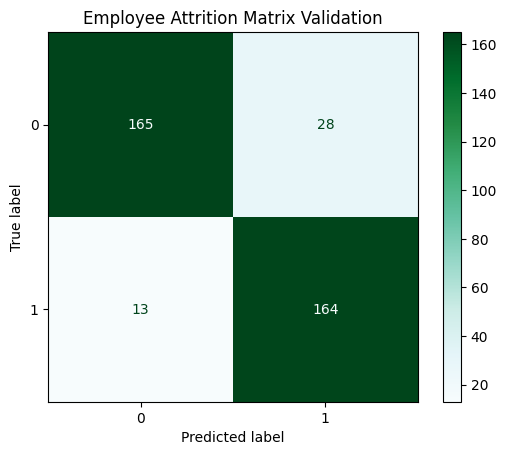

FPR for Validation E_Attrition: 0.14507772020725387
FNR for Validation E_Attrition: 0.07344632768361582


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier as E_AttGrb

Att_Eprm = { 'loss':['log_loss', 'exponential'],'learning_rate': [0.1, 0.3, 0.8],'n_estimators':[100, 140, 150, 200]}
Att_EMod = E_AttGrb(random_state=7)
Att_EMod = E_AttGsss(Att_EMod, Att_Eprm, cv=2)
Att_EMod.fit(E_AttritionXtrn.sample(400, random_state=7), E_AttritionYtrn.sample(400, random_state=7))
print(Att_EMod.best_params_)

Att_EMod = E_AttGrb(**Att_EMod.best_params_)
Att_EMod.fit(E_AttritionXtrn, E_AttritionYtrn) ###^^^%%% Training Model on E_Attrition Data

Att_YpredE = Att_EMod.predict(E_AttritionXvld) ###^^^%%% Validating Model on E_Attrition Data
print(E_AttCR(E_AttritionYvld, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYvld, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Validation")
E_AttPypl.show()

###^^^%%% Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Validation E_Attrition: {EAtt_flsprt}")
print(f"FNR for Validation E_Attrition: {EAtt_flsnrt}")

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       156
           1       0.91      0.88      0.90       214

    accuracy                           0.88       370
   macro avg       0.88      0.88      0.88       370
weighted avg       0.89      0.88      0.88       370



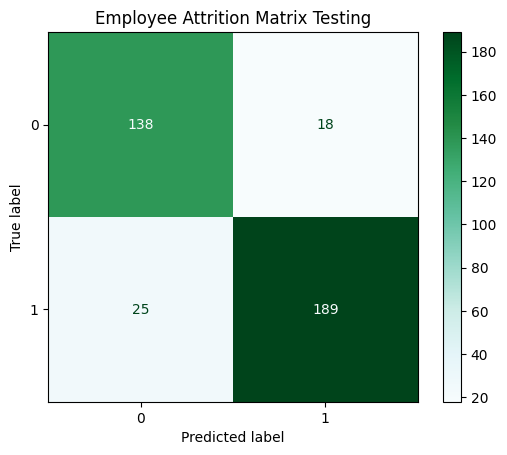

FPR for Testing E_Attrition: 0.11538461538461539
FNR for Testing E_Attrition: 0.11682242990654206


In [ ]:
Att_YpredE = Att_EMod.predict(E_AttritiontXtst) ###^^^%%% Testing Model on E_Attrition Data
print(E_AttCR(E_AttritionYtst, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYtst, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Testing")
E_AttPypl.show()

###^^^%%% Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Testing E_Attrition: {EAtt_flsprt}")
print(f"FNR for Testing E_Attrition: {EAtt_flsnrt}")

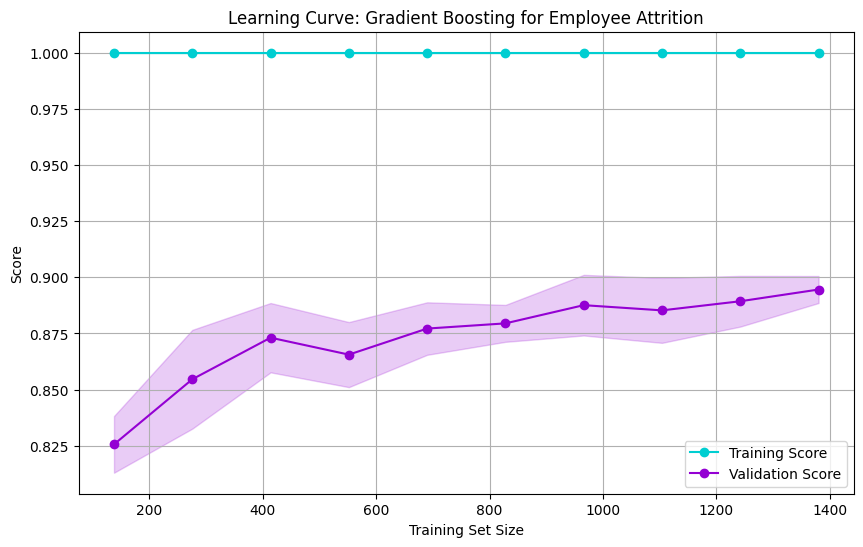

In [ ]:

from sklearn.model_selection import learning_curve as AttLearnCurve
import numpy as E_Attnu

def Emp_learningCurve(estimator, E_AttritionX, E_AttritionY, title="GB Learning Curve", cv=5, scoring="accuracy", n_jobs=-1):
    train_sizes, train_scores, val_scores = AttLearnCurve(
        estimator, E_AttritionX, E_AttritionY, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=E_Attnu.linspace(0.1, 1.0, 10)
    )

    ###^^^%%% Assessing the Mean and Standard Deviation for Data Analysis
    train_mean = E_Attnu.mean(train_scores, axis=1)
    train_std = E_Attnu.std(train_scores, axis=1)
    val_mean = E_Attnu.mean(val_scores, axis=1)
    val_std = E_Attnu.std(val_scores, axis=1)

    ###^^^%%% Visualizing Model Training with a Learning Curve
    E_AttPypl.figure(figsize=(10, 6))
    E_AttPypl.plot(train_sizes, train_mean, label="Training Score", color="darkturquoise", marker='o')
    E_AttPypl.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="darkturquoise", alpha=0.2)
    E_AttPypl.plot(train_sizes, val_mean, label="Validation Score", color="darkviolet", marker='o')
    E_AttPypl.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="darkviolet", alpha=0.2)

    E_AttPypl.title(title)
    E_AttPypl.xlabel("Training Set Size")
    E_AttPypl.ylabel("Score")
    E_AttPypl.legend(loc="best")
    E_AttPypl.grid()
    E_AttPypl.show()

Att_EMod = E_AttGrb(learning_rate= 0.8, loss= 'log_loss', n_estimators= 140) ###^^^%%%Tuning the Model with the Best-Performing Parameters

Emp_learningCurve(
    estimator=Att_EMod,
    E_AttritionX=E_AttritionXtrn,
    E_AttritionY=E_AttritionYtrn,
    title="Learning Curve: Gradient Boosting for Employee Attrition",
    cv=5
)

**Hist.Gradient Boosting Using Union Features**

{'learning_rate': 0.8, 'max_depth': 8, 'max_iter': 350}
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       193
           1       0.92      0.93      0.92       177

    accuracy                           0.93       370
   macro avg       0.93      0.93      0.93       370
weighted avg       0.93      0.93      0.93       370



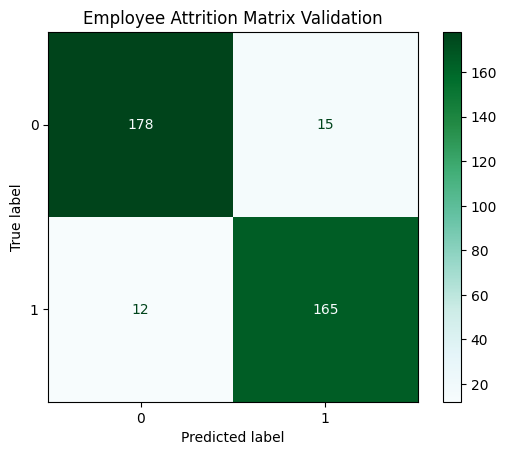

FPR for Validation E_Attrition: 0.07772020725388601
FNR for Validation E_Attrition: 0.06779661016949153


In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier as E_AttHisGrb

Att_Eprm = {'learning_rate': [0.1, 0.3, 0.8],'max_iter':[100,200,350],'max_depth':[2,5,8,9]}
Att_EMod = E_AttHisGrb(random_state=7)
Att_EMod = E_AttGsss(Att_EMod, Att_Eprm, cv=2)
Att_EMod.fit(E_AttritionXtrn.sample(400, random_state=7), E_AttritionYtrn.sample(400, random_state=7))
print(Att_EMod.best_params_)

Att_EMod = E_AttHisGrb(**Att_EMod.best_params_)
Att_EMod.fit(E_AttritionXtrn, E_AttritionYtrn) ###^^^%%% Training Model on E_Attrition Data

Att_YpredE = Att_EMod.predict(E_AttritionXvld) ###^^^%%% Validating Model on E_Attrition Data
print(E_AttCR(E_AttritionYvld, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYvld, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Validation")
E_AttPypl.show()

###^^^%%% Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Validation E_Attrition: {EAtt_flsprt}")
print(f"FNR for Validation E_Attrition: {EAtt_flsnrt}")

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       156
           1       0.92      0.88      0.90       214

    accuracy                           0.89       370
   macro avg       0.88      0.89      0.88       370
weighted avg       0.89      0.89      0.89       370



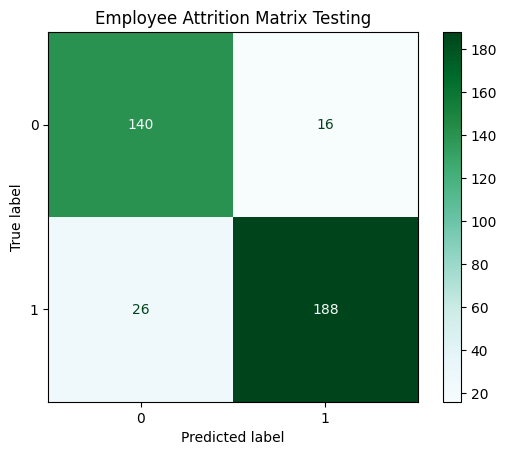

FPR for Testing E_Attrition: 0.10256410256410256
FNR for Testing E_Attrition: 0.12149532710280374


In [ ]:
Att_YpredE = Att_EMod.predict(E_AttritiontXtst) ###^^^%%% Testing Model on E_Attrition Data
print(E_AttCR(E_AttritionYtst, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYtst, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Testing")
E_AttPypl.show()

###^^^%%% Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Testing E_Attrition: {EAtt_flsprt}")
print(f"FNR for Testing E_Attrition: {EAtt_flsnrt}")

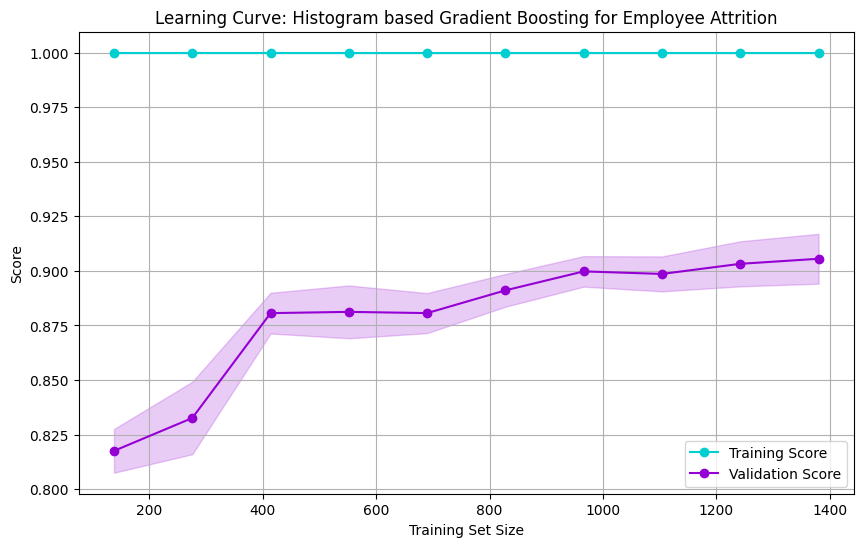

In [ ]:
def Emp_learningCurve(estimator, E_AttritionX, E_AttritionY, title="HistGB Learning Curve", cv=5, scoring="accuracy", n_jobs=-1):
    train_sizes, train_scores, val_scores = AttLearnCurve(
        estimator, E_AttritionX, E_AttritionY, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=E_Attnu.linspace(0.1, 1.0, 10)
    )

    ###^^^%%% Assessing the Mean and Standard Deviation for Data Analysis
    train_mean = E_Attnu.mean(train_scores, axis=1)
    train_std = E_Attnu.std(train_scores, axis=1)
    val_mean = E_Attnu.mean(val_scores, axis=1)
    val_std = E_Attnu.std(val_scores, axis=1)

    ###^^^%%% Visualizing Model Training with a Learning Curve
    E_AttPypl.figure(figsize=(10, 6))
    E_AttPypl.plot(train_sizes, train_mean, label="Training Score", color="darkturquoise", marker='o')
    E_AttPypl.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="darkturquoise", alpha=0.2)
    E_AttPypl.plot(train_sizes, val_mean, label="Validation Score", color="darkviolet", marker='o')
    E_AttPypl.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="darkviolet", alpha=0.2)

    E_AttPypl.title(title)
    E_AttPypl.xlabel("Training Set Size")
    E_AttPypl.ylabel("Score")
    E_AttPypl.legend(loc="best")
    E_AttPypl.grid()
    E_AttPypl.show()

Att_EMod = E_AttHisGrb(learning_rate= 0.8, max_depth= 8, max_iter= 350) ###^^^%%%Tuning the Model with the Best-Performing Parameters

Emp_learningCurve(
    estimator=Att_EMod,
    E_AttritionX=E_AttritionXtrn,
    E_AttritionY=E_AttritionYtrn,
    title="Learning Curve: Histogram based Gradient Boosting for Employee Attrition",
    cv=5
)

**Extreme Gradient Boosting Using Union Features**

{'learning_rate': 0.8, 'max_depth': 7, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       193
           1       0.90      0.93      0.91       177

    accuracy                           0.91       370
   macro avg       0.91      0.91      0.91       370
weighted avg       0.91      0.91      0.91       370



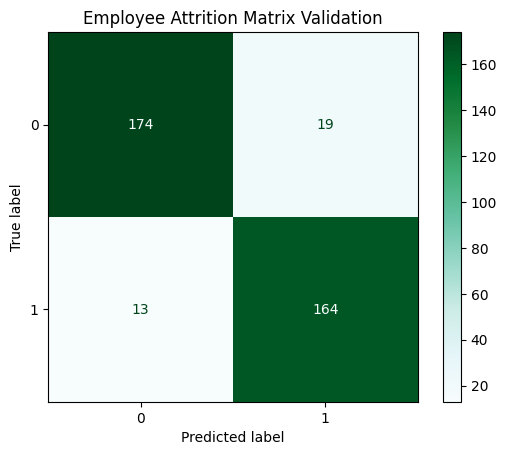

FPR for Validation E_Attrition: 0.09844559585492228
FNR for Validation E_Attrition: 0.07344632768361582


In [ ]:
from xgboost import XGBClassifier as E_AttExGrb

Att_Eprm = { 'max_depth':[2,5,7,9],'learning_rate': [0.1, 0.3, 0.8],'n_estimators':[100, 140, 150, 200]}
Att_EMod = E_AttExGrb(random_state=7)
Att_EMod = E_AttGsss(Att_EMod, Att_Eprm, cv=2)
Att_EMod.fit(E_AttritionXtrn.sample(400, random_state=7), E_AttritionYtrn.sample(400, random_state=7))
print(Att_EMod.best_params_)

Att_EMod = E_AttExGrb(**Att_EMod.best_params_)
Att_EMod.fit(E_AttritionXtrn, E_AttritionYtrn) ###^^^%%% Training Model on E_Attrition Data

Att_YpredE = Att_EMod.predict(E_AttritionXvld) ###^^^%%% Validating Model on E_Attrition Data
print(E_AttCR(E_AttritionYvld, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYvld, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Validation")
E_AttPypl.show()

###^^^%%% Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Validation E_Attrition: {EAtt_flsprt}")
print(f"FNR for Validation E_Attrition: {EAtt_flsnrt}")

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       156
           1       0.92      0.88      0.90       214

    accuracy                           0.88       370
   macro avg       0.88      0.88      0.88       370
weighted avg       0.89      0.88      0.88       370



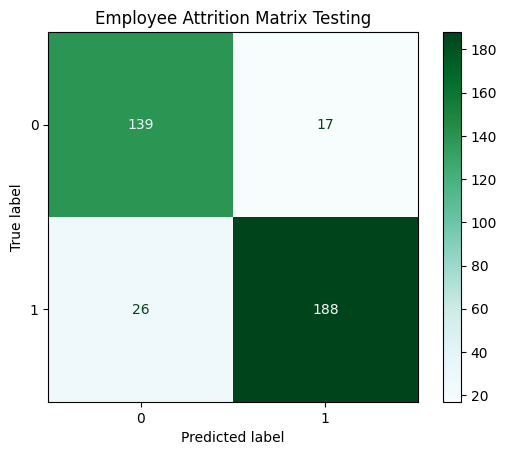

FPR for Testing E_Attrition: 0.10897435897435898
FNR for Testing E_Attrition: 0.12149532710280374


In [ ]:
Att_YpredE = Att_EMod.predict(E_AttritiontXtst) ###^^^%%% Testing Model on E_Attrition Data
print(E_AttCR(E_AttritionYtst, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYtst, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Testing")
E_AttPypl.show()

###^^^%%% Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Testing E_Attrition: {EAtt_flsprt}")
print(f"FNR for Testing E_Attrition: {EAtt_flsnrt}")

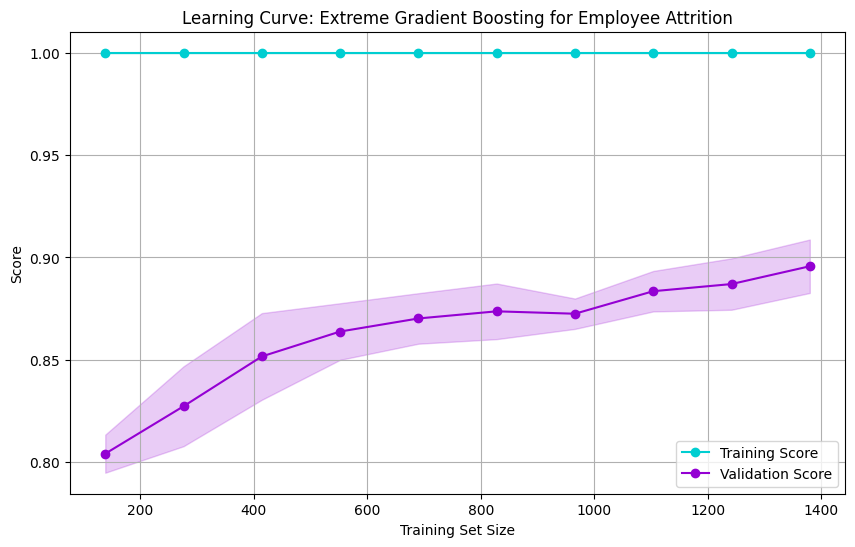

In [ ]:
def Emp_learningCurve(estimator, E_AttritionX, E_AttritionY, title="XGB Learning Curve", cv=5, scoring="accuracy", n_jobs=-1):
    train_sizes, train_scores, val_scores = AttLearnCurve(
        estimator, E_AttritionX, E_AttritionY, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=E_Attnu.linspace(0.1, 1.0, 10)
    )

    ###^^^%%% Assessing the Mean and Standard Deviation for Data Analysis
    train_mean = E_Attnu.mean(train_scores, axis=1)
    train_std = E_Attnu.std(train_scores, axis=1)
    val_mean = E_Attnu.mean(val_scores, axis=1)
    val_std = E_Attnu.std(val_scores, axis=1)

    ###^^^%%% Visualizing Model Training with a Learning Curve
    E_AttPypl.figure(figsize=(10, 6))
    E_AttPypl.plot(train_sizes, train_mean, label="Training Score", color="darkturquoise", marker='o')
    E_AttPypl.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="darkturquoise", alpha=0.2)
    E_AttPypl.plot(train_sizes, val_mean, label="Validation Score", color="darkviolet", marker='o')
    E_AttPypl.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="darkviolet", alpha=0.2)

    E_AttPypl.title(title)
    E_AttPypl.xlabel("Training Set Size")
    E_AttPypl.ylabel("Score")
    E_AttPypl.legend(loc="best")
    E_AttPypl.grid()
    E_AttPypl.show()

Att_EMod = E_AttExGrb(learning_rate= 0.8, max_depth= 7, n_estimators= 100) ###^^^%%%Tuning the Model with the Best-Performing Parameters

Emp_learningCurve(
    estimator=Att_EMod,
    E_AttritionX=E_AttritionXtrn,
    E_AttritionY=E_AttritionYtrn,
    title="Learning Curve: Extreme Gradient Boosting for Employee Attrition",
    cv=5
)

**Decision Tree Using Union Features**

{'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       193
           1       0.76      0.82      0.79       177

    accuracy                           0.79       370
   macro avg       0.79      0.79      0.79       370
weighted avg       0.79      0.79      0.79       370



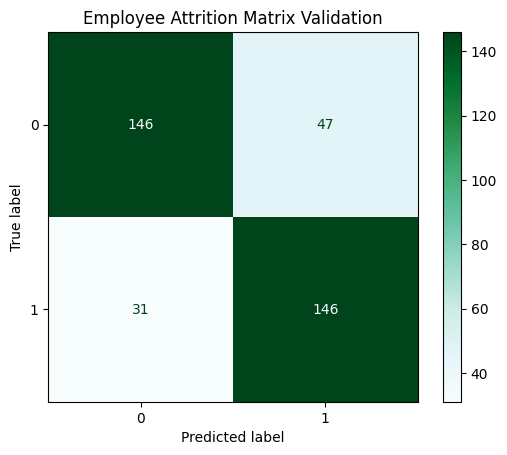

FPR for Validation E_Attrition: 0.24352331606217617
FNR for Validation E_Attrition: 0.1751412429378531


In [ ]:
from sklearn.tree import DecisionTreeClassifier as E_AttDEC

Att_Eprm = {'criterion':['gini', 'entropy', 'log_loss'],'max_depth': [10, 5, 8, 3],'min_samples_split':[2, 4, 5, 7]}
Att_EMod = E_AttDEC(random_state=7)
Att_EMod = E_AttGsss(Att_EMod, Att_Eprm, cv=2)
Att_EMod.fit(E_AttritionXtrn.sample(400, random_state=7), E_AttritionYtrn.sample(400, random_state=7))
print(Att_EMod.best_params_)

Att_EMod = E_AttDEC(**Att_EMod.best_params_)
Att_EMod.fit(E_AttritionXtrn, E_AttritionYtrn) ###^^^%%% Training Model on E_Attrition Data

Att_YpredE = Att_EMod.predict(E_AttritionXvld) ###^^^%%% Validating Model on E_Attrition Data
print(E_AttCR(E_AttritionYvld, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYvld, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Validation")
E_AttPypl.show()

###^^^%%% Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Validation E_Attrition: {EAtt_flsprt}")
print(f"FNR for Validation E_Attrition: {EAtt_flsnrt}")

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       156
           1       0.83      0.81      0.82       214

    accuracy                           0.79       370
   macro avg       0.79      0.79      0.79       370
weighted avg       0.80      0.79      0.79       370



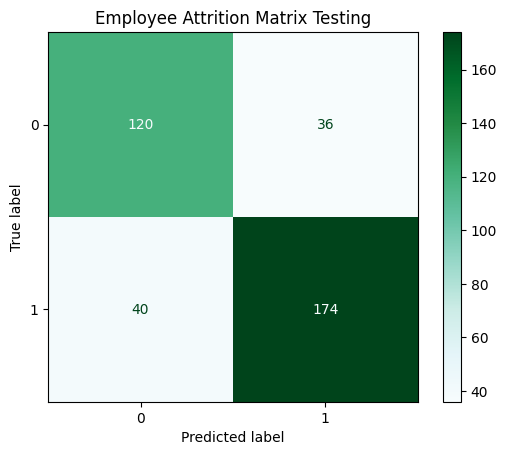

FPR for Testing E_Attrition: 0.23076923076923078
FNR for Testing E_Attrition: 0.18691588785046728


In [ ]:
Att_YpredE = Att_EMod.predict(E_AttritiontXtst) ###^^^%%% Testing Model on E_Attrition Data
print(E_AttCR(E_AttritionYtst, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYtst, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Testing")
E_AttPypl.show()

###^^^%%% Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Testing E_Attrition: {EAtt_flsprt}")
print(f"FNR for Testing E_Attrition: {EAtt_flsnrt}")

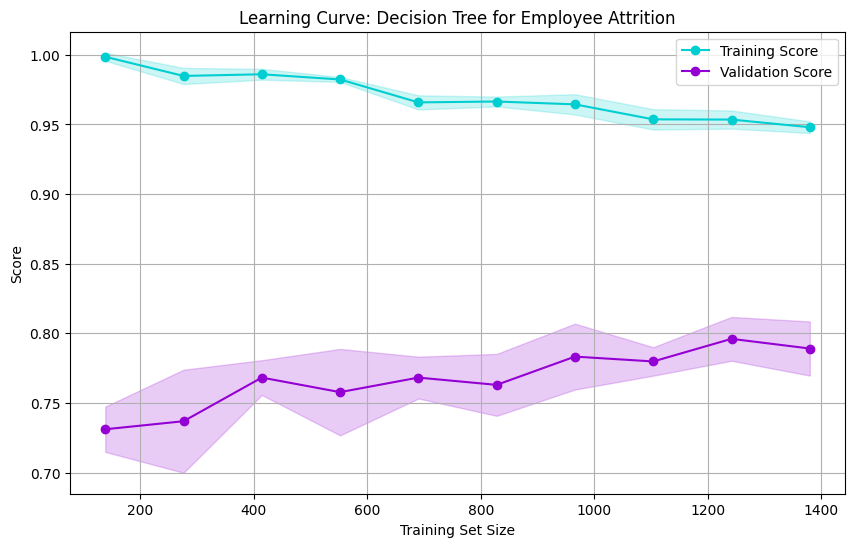

In [ ]:
def Emp_learningCurve(estimator, E_AttritionX, E_AttritionY, title="DT Learning Curve", cv=5, scoring="accuracy", n_jobs=-1):
    train_sizes, train_scores, val_scores = AttLearnCurve(
        estimator, E_AttritionX, E_AttritionY, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=E_Attnu.linspace(0.1, 1.0, 10)
    )

    ###^^^%%% Assessing the Mean and Standard Deviation for Data Analysis
    train_mean = E_Attnu.mean(train_scores, axis=1)
    train_std = E_Attnu.std(train_scores, axis=1)
    val_mean = E_Attnu.mean(val_scores, axis=1)
    val_std = E_Attnu.std(val_scores, axis=1)

    ###^^^%%% Visualizing Model Training with a Learning Curve
    E_AttPypl.figure(figsize=(10, 6))
    E_AttPypl.plot(train_sizes, train_mean, label="Training Score", color="darkturquoise", marker='o')
    E_AttPypl.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="darkturquoise", alpha=0.2)
    E_AttPypl.plot(train_sizes, val_mean, label="Validation Score", color="darkviolet", marker='o')
    E_AttPypl.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="darkviolet", alpha=0.2)

    E_AttPypl.title(title)
    E_AttPypl.xlabel("Training Set Size")
    E_AttPypl.ylabel("Score")
    E_AttPypl.legend(loc="best")
    E_AttPypl.grid()
    E_AttPypl.show()

Att_EMod = E_AttDEC(criterion= 'gini', max_depth= 8, min_samples_split= 2) ###^^^%%%Tuning the Model with the Best-Performing Parameters

Emp_learningCurve(
    estimator=Att_EMod,
    E_AttritionX=E_AttritionXtrn,
    E_AttritionY=E_AttritionYtrn,
    title="Learning Curve: Decision Tree for Employee Attrition",
    cv=5
)

**MLP Using Union Features**

{'activation': 'relu', 'hidden_layer_sizes': 20, 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.56      0.66      0.61       193
           1       0.54      0.44      0.48       177

    accuracy                           0.55       370
   macro avg       0.55      0.55      0.55       370
weighted avg       0.55      0.55      0.55       370



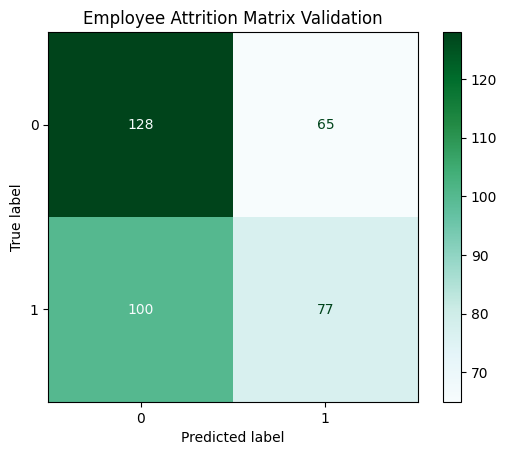

FPR for Validation E_Attrition: 0.33678756476683935
FNR for Validation E_Attrition: 0.5649717514124294


In [ ]:
from sklearn.neural_network import MLPClassifier as E_AttMult

Att_Eprm = {'hidden_layer_sizes':[10, 20, 30],'activation': ['relu','tanh','logistic'],'solver':['lbfgs','adam','sgd']}
Att_EMod = E_AttMult(random_state=7)
Att_EMod = E_AttGsss(Att_EMod, Att_Eprm, cv=2)
Att_EMod.fit(E_AttritionXtrn.sample(400, random_state=7), E_AttritionYtrn.sample(400, random_state=7))
print(Att_EMod.best_params_)

Att_EMod = E_AttMult(**Att_EMod.best_params_)
Att_EMod.fit(E_AttritionXtrn, E_AttritionYtrn) ###^^^%%% Training Model on E_Attrition Data

Att_YpredE = Att_EMod.predict(E_AttritionXvld) ###^^^%%% Validating Model on E_Attrition Data
print(E_AttCR(E_AttritionYvld, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYvld, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Validation")
E_AttPypl.show()

###^^^%%% Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Validation E_Attrition: {EAtt_flsprt}")
print(f"FNR for Validation E_Attrition: {EAtt_flsnrt}")

              precision    recall  f1-score   support

           0       0.47      0.62      0.53       156
           1       0.64      0.50      0.56       214

    accuracy                           0.55       370
   macro avg       0.55      0.56      0.55       370
weighted avg       0.57      0.55      0.55       370



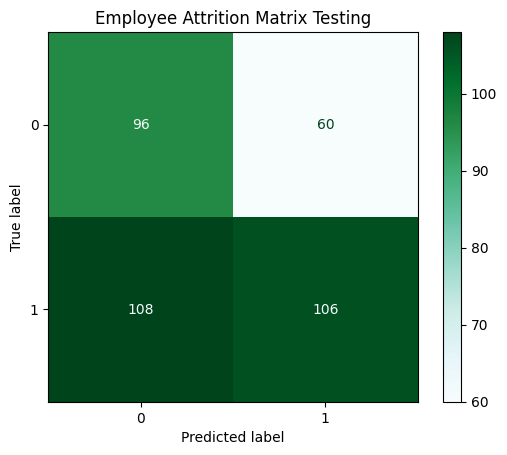

FPR for Testing E_Attrition: 0.38461538461538464
FNR for Testing E_Attrition: 0.5046728971962616


In [ ]:
Att_YpredE = Att_EMod.predict(E_AttritiontXtst) ###^^^%%% Testing Model on E_Attrition Data
print(E_AttCR(E_AttritionYtst, Att_YpredE))

E_MxxAtt = E_AttMx(E_AttritionYtst, Att_YpredE)
Att_EMDS(confusion_matrix = E_MxxAtt, display_labels = [0, 1]).plot(cmap='BuGn')
E_AttPypl.title("Employee Attrition Matrix Testing")
E_AttPypl.show()

###^^^%%% Assessing FPR and FNR for the E_Attrition Model
EAtt_truN, EAtt_flsP, EAtt_flsN, EAtt_truP = E_MxxAtt.ravel()
EAtt_flsprt = EAtt_flsP / (EAtt_flsP + EAtt_truN)
EAtt_flsnrt = EAtt_flsN / (EAtt_flsN + EAtt_truP)
print(f"FPR for Testing E_Attrition: {EAtt_flsprt}")
print(f"FNR for Testing E_Attrition: {EAtt_flsnrt}")

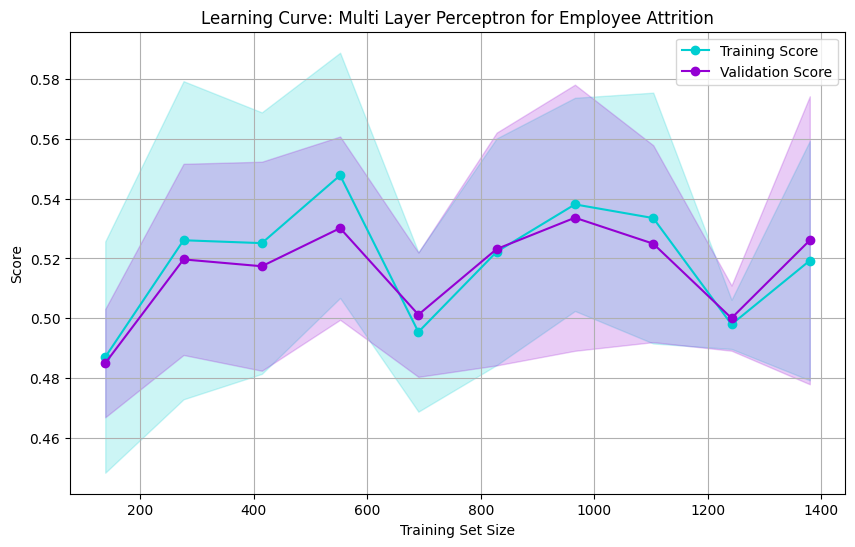

In [ ]:
def Emp_learningCurve(estimator, E_AttritionX, E_AttritionY, title="MLP Learning Curve", cv=5, scoring="accuracy", n_jobs=-1):
    train_sizes, train_scores, val_scores = AttLearnCurve(
        estimator, E_AttritionX, E_AttritionY, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=E_Attnu.linspace(0.1, 1.0, 10)
    )

    ###^^^%%% Assessing the Mean and Standard Deviation for Data Analysis
    train_mean = E_Attnu.mean(train_scores, axis=1)
    train_std = E_Attnu.std(train_scores, axis=1)
    val_mean = E_Attnu.mean(val_scores, axis=1)
    val_std = E_Attnu.std(val_scores, axis=1)

    ###^^^%%% Visualizing Model Training with a Learning Curve
    E_AttPypl.figure(figsize=(10, 6))
    E_AttPypl.plot(train_sizes, train_mean, label="Training Score", color="darkturquoise", marker='o')
    E_AttPypl.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="darkturquoise", alpha=0.2)
    E_AttPypl.plot(train_sizes, val_mean, label="Validation Score", color="darkviolet", marker='o')
    E_AttPypl.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="darkviolet", alpha=0.2)

    E_AttPypl.title(title)
    E_AttPypl.xlabel("Training Set Size")
    E_AttPypl.ylabel("Score")
    E_AttPypl.legend(loc="best")
    E_AttPypl.grid()
    E_AttPypl.show()

Att_EMod = E_AttMult(activation= 'relu', hidden_layer_sizes= 20, solver= 'lbfgs') ###^^^%%%Tuning the Model with the Best-Performing Parameters

Emp_learningCurve(
    estimator=Att_EMod,
    E_AttritionX=E_AttritionXtrn,
    E_AttritionY=E_AttritionYtrn,
    title="Learning Curve: Multi Layer Perceptron for Employee Attrition",
    cv=5
)